In [3]:
import scipy as sp

최적화를 위해 사이파이의 minimize() 함수를 사용할 수 있다.

세부적인 알고리즘은 method 인수로 선택하며 디폴트 알고리즘은 준 뉴턴 방법 중 하나인 BFGS 방법이다.

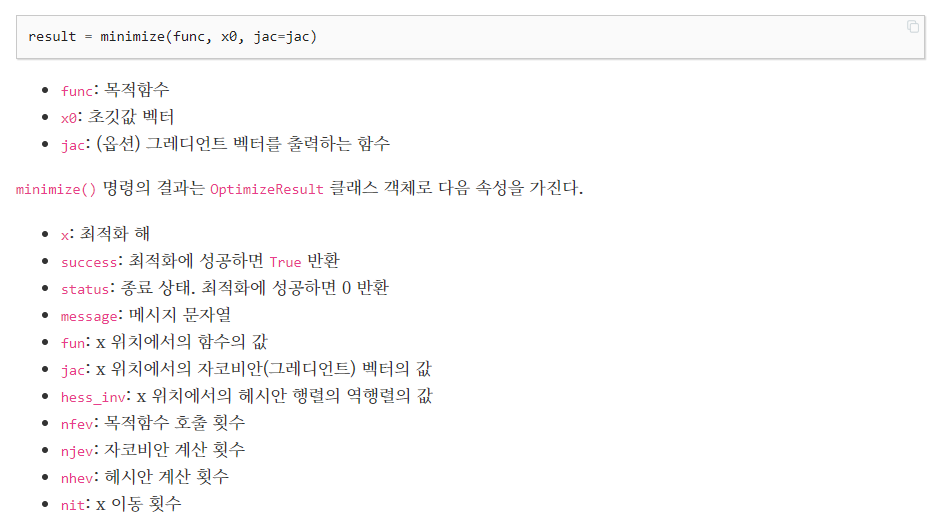

### 예제

`minimize()` 명령으로 1차원 함수를 최적화해보자.

In [4]:
# 목적함수

def f1(x):
    return (x - 2) ** 2 + 2

x0 = 0 # 초깃값

result = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


- success : 최적화 성공 여부 반환

- fun : x 위치에서의 함수 값

- hess_inv : 2차 도함수를 의미, 양수면 볼록 음수면 오목

- jac : 그래디언트 벡터, 기울기를 의미

- nit : 2번 시도

- nfev : 수치미분 횟수, 2번 시도이므로 포인트는 3개(최초 포인트 포함) 따라서 포인트당 3번 계산되므로 9

nfev가 9번인 이유는 그래디언트 계산에 필요한 1차 미분 함수 혹은 헤시안 함수가 주어지지 않아 $x$값 위치 근처에서 함수를 계산하여 벡터의 근삿값을 찾기 때문이다.

이를 방저하기 위해선 직접 그래디언트 벡터값을 반환하는 함수를 만들언 `jac` 인수에 넣어주면 된다.

$f1 = (x-2)^2 + 2$

$f1p = 2(x - 2)$

In [6]:
def f1p(x):
    '''f1(x)의 도함수 (미분결과)'''
    return 2 * (x - 2)

result = sp.optimize.minimize(f1, x0, jac = f1p)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


### 예제 - 다변수함수를 최적화 하는 경우

다변수함수를 최적화 하는 경우 목적함수가 벡터 인수를 가져야한다.

In [7]:
# 2차원 목적함수 재정의 (벡터 입력을 받도록)

def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2 # 벡터 입력

x0 = (-2, -2)

result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 9.591264224301295e-12
 hess_inv: array([[0.49971058, 0.99932097],
       [0.99932097, 2.00343249]])
      jac: array([ 3.28126764e-05, -1.49149826e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 246
      nit: 54
     njev: 78
   status: 2
  success: False
        x: array([0.99999701, 0.99999395])


이와 같이 싱패하는 경우도 있다. 이 경우 진동현상으로 인해 nfev, nit 이 많아진 것을 확인할 수 있고 실패하더라고 최적화 결과를 이용해 최적화가 필요하다.

### 로젠브록 함수 최적화 성공시키기

- x의 초기점을 변경시켜보기.

In [41]:
# 2차원 목적함수 재정의 (벡터 입력을 받도록)

def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2 # 벡터 입력

x0 = (2, 0.3)

result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 2.0894372192990412e-11
 hess_inv: array([[0.49022119, 0.98027061],
       [0.98027061, 1.96519156]])
      jac: array([ 1.58935038e-06, -8.86405793e-07])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999543, 0.99999085])


- 그래디언트 함수를 jac 인수로 넘겨보기

로젠브록 함수는 다음과 같다.

$f(x, y) = (1x)^2 + 100(yx^2)^2$

In [46]:
import sympy

x, y = sympy.symbols('x y')

f = (1 - x)**2 + 100.0 * (y - x**2)**2
f

(1 - x)**2 + 100.0*(-x**2 + y)**2

In [47]:
sympy.diff(f, x)

-400.0*x*(-x**2 + y) + 2*x - 2

In [51]:
sympy.diff(f, y)

-200.0*x**2 + 200.0*y

In [63]:
def f2g(x):
    '''로젠브록 함수의 도함수'''
    return np.array((-400 * x[0]) * (-x[0]**2 + x[1]) + (2*x[0] - 2)), (-200 * x[0] ** 2) + (200 * x[1])


x0 = (2, 0.3)

sp.optimize.minimize(f2, x0, jac = f2g)

      fun: 1.0392862476911913e-14
 hess_inv: array([[0.49022342, 0.98027934],
       [0.98027934, 1.96521752]])
      jac: array([ 1.58870156e-06, -8.86163946e-07])
  message: 'Optimization terminated successfully.'
     nfev: 25
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999991, 0.99999981])

## 전역 최적화 문제

다음 그래프와 같이 목적함수가 복수의 국소 최저점(local minimum)을 가진 경우 수치적 최적화 방법으로 전역 최저점(global minimum)에 도달한다는 보장이 없다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


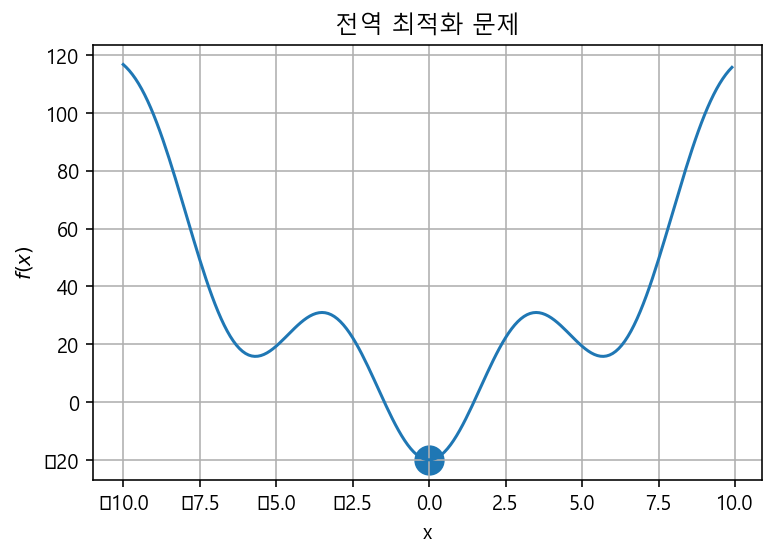

In [66]:
def f_global(x):
    """비선형 목적함수"""
    return x**2 - 20 * np.cos(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x))
plt.scatter(0, f_global(0), s=200)
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.title("전역 최적화 문제")
plt.grid()
plt.show()

아래의 경우는 초깃값이 좋지 않아 전역최저점에 수렴하지 못한 경우이다.

In [71]:
x0 = 4
result = sp.optimize.minimize(f_global, x0)
print(result)
x_sol = result['x']
x_sol

      fun: 15.791736781359312
 hess_inv: array([[0.05417267]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([5.67920777])


array([5.67920777])

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


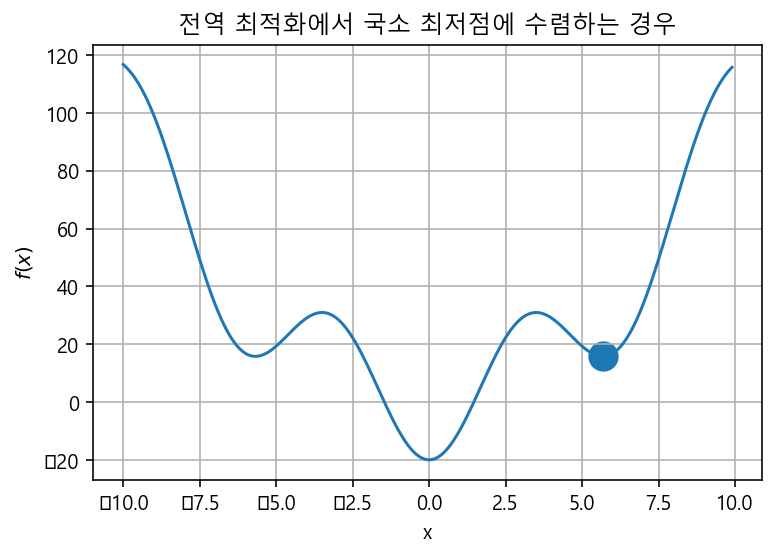

In [72]:
plt.plot(x, f_global(x));
plt.scatter(x_sol, f_global(x_sol), s=200)
plt.title("전역 최적화에서 국소 최저점에 수렴하는 경우")
plt.ylabel("$f(x)$")
plt.xlabel("x")
plt.grid()
plt.show()

## 컨벡스 문제

전역 최적화 문제를 해결하기 위해 간단한 ML과 같은 경우에 컨벡스 문제로 귀결된다.

목적함수의 2차 도함수 값이 항상 0 이상이 되는 영역에서만 정의된 문제를 **컨벡스(convex)**문제라 한다.

\begin{align}
\dfrac{\partial^2 f}{\partial x^2} \geq 0 
\end{align}

컨벡스 문제가 **다변수 목적함수의 경우에는 주어진 영역에서 헤시안 행렬이 항상 양의 준정부호(PSD)**라는 조건이 된다.

\begin{align}
x^THx \geq 0 \;\;\text{for all } x 
\end{align}

**컨벡스 문제에서는 항상 전역 최저점이 존재한다**

In [73]:
def f2prime(x):
    return np.array([2 * (x[0] - 1) + 400 * x[0] * (x[0]**2 - x[1]),
                     200 * x[1] * (x[1] - x[0]**2)])

result = sp.optimize.minimize(f2, (2, 0.3), jac=None)
print(result)

      fun: 2.0894372192990412e-11
 hess_inv: array([[0.49022119, 0.98027061],
       [0.98027061, 1.96519156]])
      jac: array([ 1.58935038e-06, -8.86405793e-07])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999543, 0.99999085])


## 등식 제한조건이 있는 최적화 문제

다음과 같이 함수 $f$의 값을 가장 작게 만드는 $x^*$를 찾기 위해선 어떻게 해야할까?

$x$값을 음의 무한대로 변경하면 되지 않을까?

\begin{align}
x^{\ast} = \text{arg} \min_x f(x)
\end{align}

\begin{align}
x \in \mathbf{R}^N  
\end{align}

\begin{align}
g_j(x) = 0 \;\; (j=1, \ldots, M)  
\end{align}

그런데 여기에 $g$라는 조건이 추가적으로 붙는다면?

등식 제한 조건 $M$개가 있으니 $M차 연립 방정식이 된다.$

\begin{split}
\begin{align}
\begin{aligned}
g_1(x) &= 0 \\
g_2(x) &= 0 \\
&\vdots \\
g_M(x) &= 0 \\
\end{aligned}
\end{align}
\end{split}

따라서 위 연립방정식을 만족하면서 목적함수 $f(x)$를 가장 작게 만드는 $x$값을 찾아야한다.

### 예제

목적함수와 등식제한조건이 다음과 같다고 가정해보자.

\begin{align}
f(x_1, x_2) = x_1^2 + x_2^2 
\end{align}

\begin{align}
g(x_1, x_2) = x_1 + x_2 - 1 = 0 
\end{align}

이 문제는 $g(x_1, x_2) = 0$이 되는 직선상의 점 $x_1, x_2$를 찾는 문제가 된다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


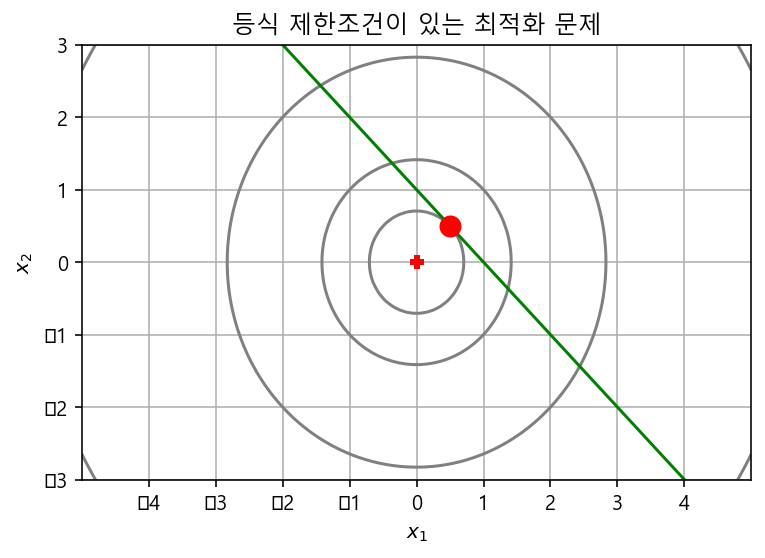

In [76]:
# 목적함수 f(x) = x1^2 + x2^2
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)

# 등식 제한조건 방정식 g(x) = x1 + x2 - 1 = 0
x2_g = 1 - x1

plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("등식 제한조건이 있는 최적화 문제")
plt.grid()
plt.show()

## 라그랑주 승수법

위의 등식 제한조건이 추가된 최적화 문제를 해결하기 위한 방법으로 **라그랑주 승수법**이 사용된다.

이는 제한조건 등식에 새로운 변수 $\lambda$를 곱해서 더한 함수

\begin{split}
\begin{align}
\begin{aligned}
h(x, \lambda) 
&= h(x_1, x_2, \ldots , x_N, \lambda_1, \ldots , \lambda_M) \\
&= f(x) + \sum_{j=1}^M \lambda_j g_j(x)
\end{aligned}
\end{align}
\end{split}

를 새로운 목적함수로 최적화를 진행한다.

여기서 제한조건 등식 하나 하나에 새로운 $\lambda_i$가 추가되기 때문에 제한조건이 $M$개인 경우 $\lambda$는 $M$개가 새로 생겨난다.

따라서 새로운 목적함수 $h$는 그래디언트 벡터를 영벡터로 만드는 최적화 필요 조건이 다음과 같이 $N + M$개가 된다.

\begin{split} 
\begin{align}
\begin{aligned}
\dfrac{\partial h}{\partial x_1} 
&= \dfrac{\partial f}{\partial x_1} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_1} = 0 \\
\dfrac{\partial h}{\partial x_2} 
&= \dfrac{\partial f}{\partial x_2} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_2} = 0 \\
& \vdots  \\
\dfrac{\partial h}{\partial x_N} 
&= \dfrac{\partial f}{\partial x_N} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_N} = 0 \\
\dfrac{\partial h}{\partial \lambda_1} 
&= g_1 = 0 \\
& \vdots  \\
\dfrac{\partial h}{\partial \lambda_M} 
&= g_M = 0 
\end{aligned}
\end{align}
\end{split}

이 연립방정식을 풀면 $N + M$개의 미지수 $x_i, \lambda_i$를 구할 수 있다.

여기서 라그랑주 승수값은 제외하고 남는 $x$가 바로 최소값이 된다.

### 예제

\begin{align}
f(x_1, x_2) = x_1^2 + x_2^2 
\end{align}

\begin{align}
g(x_1, x_2) = x_1 + x_2 - 1 = 0 
\end{align}

위 함수와 등식제한조건을 만족하는 최솟값을 라그랑주 승수법으로 구해보자.

$\lambda$를 이용한 새로운 목적함수 $h$는 다음과 같다.

\begin{align}
h(x_1, x_2, \lambda) 
= f(x_1, x_2) + \lambda g(x_1, x_2) 
= x_1^2 + x_2^2 + \lambda ( x_1 + x_2 - 1 ) 
\end{align}

새로운 목적함수에 각 변수에 대한 편미분을 하면

\begin{split} 
\begin{align}
\begin{aligned}
\dfrac{\partial h}{\partial x_1} 
&= 2{x_1} + \lambda = 0 \\
\dfrac{\partial h}{\partial x_2} 
&= 2{x_2} + \lambda = 0 \\
\dfrac{\partial h}{\partial \lambda} 
&= x_1 + x_2 - 1 = 0 
\end{aligned}
\end{align}
\end{split}

가 된다.

이 방정식을 풀면

\begin{align}
x_1 = x_2 = \dfrac{1}{2}, \;\;\; \lambda = -1
\end{align}

가 된다.

### 연습문제

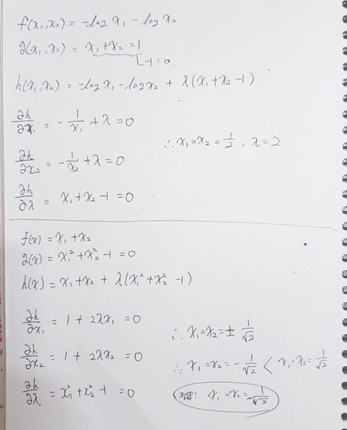

## 사이파이를 이용한 등식제한조건 최적화 문제 계산

사이파이의 optimize 서브패키지는 제한조건이 있는 최적화 문제를 푸는 fmin_slsqp() 명령을 제공한다.

`fmin_slsqp(func_objective, x0, eqcons=[func_constraint1, func_constraint2])`

- `fmin_slsqp()` : 목적함수와 초깃값, 제한조건 함수의 리스트를 인수로 받음
    - 목적함수는 배열인 인수를 받도록 구현
    - 제한조건 함수는 항상 eqcons 인수를 명시

In [78]:
def f1array(x):
    return x[0] ** 2 + x[1] ** 2

def eq_constraint(x):
    return x[0] + x[1] -1

sp.optimize.fmin_slsqp(f1array, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5000000000000002
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


array([0.5, 0.5])

## 라그랑주 승수의 의미

최적화 문제에서 등식 제한조건이 있는지 없는지에 따라 해가 달라진다면 라그랑주 승수 $\lambda$는 0이 아니어야 한다.

왜냐하면 라그랑주 승수가 0인 경우 원래의 문제와 제한조건이 있는 문제의 최적화 조건과 같아지므로 최적화 해의 위치도 같기 때문이다.

즉, 제한조건이 있긴 하지만 실질적으로 필요가 없는 제한조건이 된다는 의미이다.

## 부등식 제한조건이 있는 최적화 문제

\begin{align}
x^{\ast} = \text{arg} \min_x f(x) 
\end{align}

\begin{align}
x \in \mathbf{R}^N  
\end{align}

\begin{align}
g_j(x) \leq 0 \;\; (j=1, \ldots, M)  
\end{align}

위와 같이 부등식 제한조건이 있는 최적화 문제에 대해 알아보자.

부등식이 다음과 같다면 양변에 -1을 곱해 부등호의 방향을 바꾼다.

\begin{align}
g_j(x) \geq 0
\end{align}

부등식 제한조건도 마찬가지로 라그랑주 승수법과 동일하게 목적함수를 다음과 같이 변형한다.

\begin{align}
h(x, \lambda) = f(x) + \sum_{j=1}^M \lambda_j g_j(x)
\end{align}

여기서부터 등식제한조건과 달라지는데

**KKT(Karush-Kuhn-Tucker)**라는 3개의 조건으로 이루어진다.

1. 모든 독립변수 $x_1 ... x_N$에 대한 미분값은 0

\begin{align}
\dfrac{\partial h(x, \lambda)}{\partial x_i} = 0 
\end{align}

2. 라그랑주 승수 $\lambda_1, ..., \lambda_M$과 제한조건 부등식($\lambda$에 대한 미분값)의 곱이 0

\begin{align}
\lambda_j \cdot \dfrac{\partial h(x, \lambda)}{\partial \lambda_j} = \lambda_j \cdot g_j = 0 
\end{align}

3. 라그랑주 승수는 음수가 아니어야 한다.

\begin{align}
\lambda_j \geq 0 
\end{align}

1번 조건은 등식 제한조건과 같다. 즉, 라그랑주 승수에 대한 미분은 0이 아니어도 된다.

2번의 수식을 보면 확장된 목적함수를 라그랑주 승수로 미분한 값은 변수 $x$에 대한 미분과 달리 반드시 0일 필요가 없다. 또한 0이어도 된다.

라그랑주 승수가 0이라는 의미는 사실상 의미 없는 제한조건이라는 의미이다.(부등식 제한조건은 일종의 면적으로 이해하면 된다.)

### 예제

부등식 제한조건을 가지는 최적화의 예

- 목적함수

\begin{align}
f(x_1, x_2) = x_1^2 + x_2^2 
\end{align}

- 두가지 제한조건의 예시

\begin{align}
g(x_1, x_2) = x_1 + x_2 - 1 \leq 0 
\end{align}

\begin{align}
g(x_1, x_2) = -x_1 - x_2 + 1 \leq 0 
\end{align}

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


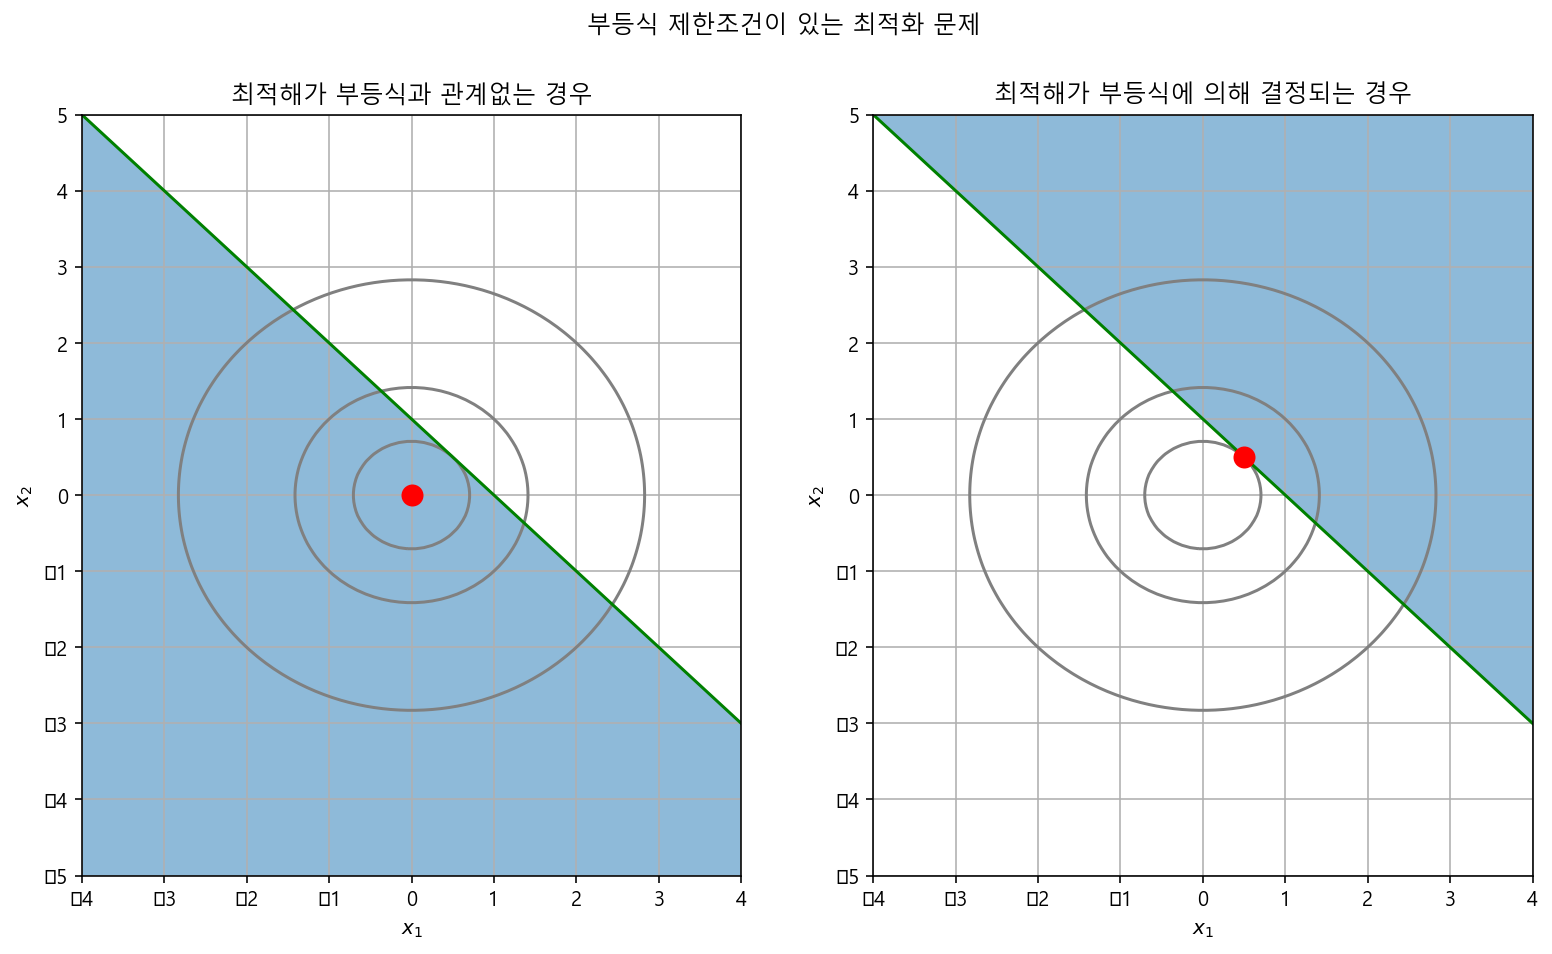

In [82]:
plt.figure(figsize=(13, 7))
ax1 = plt.subplot(121)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax1.fill_between(x1, -20, x2_g, alpha=0.5)
plt.plot([0], [0], 'ro', ms=10)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식과 관계없는 경우")
plt.grid()
ax2 = plt.subplot(122)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax2.fill_between(x1, 20, x2_g, alpha=0.5)
plt.plot([0.5], [0.5], 'ro', ms=10)
plt.xlabel("x_1")
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식에 의해 결정되는 경우")
plt.suptitle("부등식 제한조건이 있는 최적화 문제")
plt.grid()
plt.show()

그림에서 보듯이 부등식 제한조건이 있는 최적화 문제를 풀면 그 제한조건은 다음 두 가지 경우의 하나가 되어 버린다.

- 최적화 결과에 전혀 영향을 주지 않는 쓸모없는 제한조건

- 최적화 결과에 영향을 주는 등식(equality)인 제한조건

즉, 어느 경우든 부등식 제한조건 문제로 시작해도 끝은 등식 제한 조건 문제를 푸는 것과 같다.

## 예제

복수의 부등식 제한조건이 있는 또다른 2차원 최적화 문제

\begin{align}
\text{arg} \min_x \; (x_1-4)^2 + (x_2-2)^2
\end{align}

\begin{align}
g_1(x) = x_1 + x_2 - 1\leq 0
\end{align}

\begin{align}
g_2(x) = -x_1 + x_2 - 1\leq 0
\end{align}

\begin{align}
g_3(x) = -x_1 - x_2 - 1\leq 0
\end{align}

\begin{align}
g_4(x) = x_1 - x_2 - 1\leq 0
\end{align}

이 4개의 제한조건을 다음과 같은 하나의 부등식으로 나타낸다.

\begin{align}
g(x) 
= \left\vert\, x_1 \right\vert + \left\vert\, x_2 \right\vert - 1 
= \sum_{i=1}^{2} \left\vert\, x_i \right\vert - 1 \leq 0 
\end{align}

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


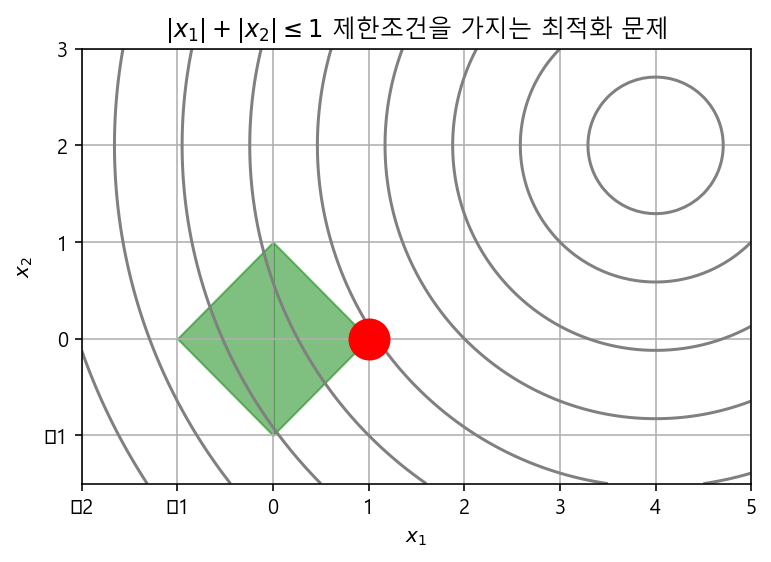

In [83]:
def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)


x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f2plt(X1, X2)

plt.contour(X1, X2, Y, colors="gray",
            levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

# 제한 조건의 상수
k = 1
ax = plt.gca()
x12 = np.linspace(-k, 0, 10)
x13 = np.linspace(0, k, 10)
ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)
ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5)

# 최적점 위치
x1_sol = 1
x2_sol = 0
plt.plot(x1_sol, x2_sol, 'ro', ms=20)

plt.xlim(-2, 5)
plt.ylim(-1.5, 3)
plt.xticks(np.linspace(-2, 5, 8))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제".format(k))
plt.grid()
plt.show()

### 연습문제

x1=1,x2=0

이라는 사실을 이용하여 라그랑주 승수 λ1, λ2, λ3, λ4 중 어느 값이 0이 되는지 알아내라.

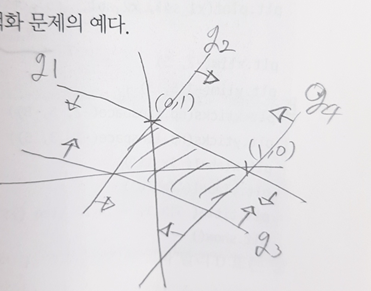

이므로 사실상 $g_2, g_3$는 쓸모 없는 제한조건, 따라서 $\lambda_2, \lambda_3$는 0

## 사이파이를 사용하여 부등식 제한조건이 있는 최적화 문제 계산

`fmin_slsqp()`의 인수를 `ieqcons`로 준다.

`fmin_slsqp(func_objective, x0, ieqcons=[func_constraint1, func_constraint2])`

**단 ieqcons에 들어가는 부등호의 부호는 우리가 지금까지 사용한 방식과 달리 0 또는 양수이어야 한다**

\begin{align}
g \geq 0
\end{align}

In [90]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 0.5
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))


sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.031128897766439
            Iterations: 12
            Function evaluations: 66
            Gradient evaluations: 12


array([4.99999937e-01, 6.34692395e-08])

In [84]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 1
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))


sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.605551280732028
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11


array([9.99999981e-01, 1.89941792e-08])

In [85]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 2
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))


sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.8284287493322235
            Iterations: 8
            Function evaluations: 30
            Gradient evaluations: 8


array([1.9978564, 0.0021436])

In [91]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 3
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))


sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.1213203438762323
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 6


array([2.4999741, 0.5000259])

## 선형계획법 문제

방정식이나 부등식 제한조건을 가지는 선형모델(linear model)의 값을 최소화 하는 문제를 **선형계획법(linearar programming)**이라 한다. (LP문제)

선형계획법 문제의 목적함수

\begin{align}
\arg\min_x c^Tx 
\end{align}

는 내적된 형태의 스칼라 값이다.

선형 연립방정식으로 된 등식제한조건

$Ax = b$

변숫값이 모두 음수가 아니어야 하는 부등식 제한조건

\begin{align}
x \geq 0
\end{align}

을 동시에 갖는다.

선형계획법 문제는 여러가지 형태가 존재하는데 위와 같은 형태를 선형계획법 문제의 기본형(standard form)이라고 한다. 마지막 부등식 제한 조건은 벡터 x의 모든 원소가 양수거나 0이 되어야 한다는 것을 의미한다. 표준형을 확장한 정규형(canonical form) 선형계획법 문제는 부등식 조건을 허용한다.

\begin{align}
Ax \leq b 
\end{align}

\begin{align}
x \geq 0
\end{align}

예제¶
어떤 공장에서 두가지 제품을 생산해야 한다고 하자.

제품 A와 제품 B 각각 100개 이상 생산해야 한다.

시간은 500시간 밖에 없다.

제품 A는 생산하는데 1시간이 걸리고 제품 B는 2시간이 걸린다.

특정 부품이 9800개밖에 없다.

제품 A는 생산하는데 특정 부품을 4개 필요로 하고 제품 B는 생산하는데 특정 부품을 5개 필요로 한다.

제품 A의 이익은 하나당 3만원이고 제품 B의 이익은 하나당 5만원이다.

제품 A와 제품 B의 생산량을 각각 x1,x2라고 하면 최소화하려는 목적함수는

---

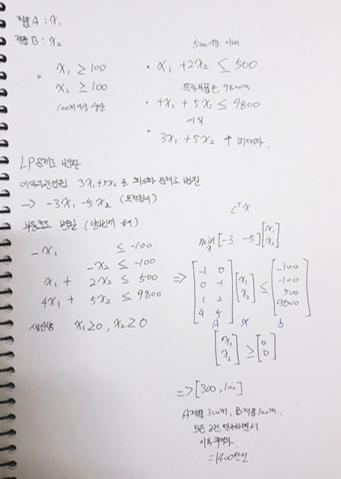

scipy.optimize 패키지의 linprog() 명령을 사용하면 선형계획법 문제를 풀 수 있다. 사용법은 다음과 같다.

`linprog(c, A, b)`

c: 목적함수의 계수 벡터

A: 등식 제한조건의 계수 행렬

b: 등식 제한조건의 상수 벡터

In [93]:
import scipy.optimize

A = np.array([[-1, 0], [0, -1], [1, 2], [4, 5]])
b = np.array([-100, -100, 500, 9800])
c = np.array([-3, -5])

result = sp.optimize.linprog(c, A, b)
result

     con: array([], dtype=float64)
     fun: -1399.9999948073819
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([1.99999991e+02, 4.19920389e-06, 3.31138096e-07, 8.10000001e+03])
  status: 0
 success: True
       x: array([299.99999127, 100.0000042 ])

## CVXPY를 이용한 선형계획법 문제 계산

In [94]:
!pip install cvxpy

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for ecos: filename=ecos-2.0.7.post1-cp37-cp37m-win_amd64.whl size=68307 sha256=e662fd84b939c5306c048539992edf9a53839a500e6700a2eec9cf4952e350be
  Stored in directory: c:\users\kim\appdata\local\pip\cache\wheels\70\e7\fd\4a4f957fc18a0f0407ca4b331c51e6a469c92efec58f732edf
  Created wheel for scs: filename=scs-2.1.4-cp37-cp37m-win_amd64.whl size=120027 sha256=e26ba42582596778e5a42dcfb0fc826817ea824c567cee24d71d49807454d93a
  Stored in directory: c:\users\kim\appdata\local\pip\cache\wheels\d6\58\0b\a55ff6d4e2da4c9776e363a778ea13e4068037a7be82eb85e0
Successfully built ecos scs


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [96]:
import cvxpy as cp

# 변수정의
a = cp.Variable()
b = cp.Variable()

# 조건의 정의
constraints = [
    a >= 100,  # A를 100개 이상 생산해야 한다.
    b >= 100,  # B를 100개 이상 생산해야 한다. 
    a + 2 * b <= 500, # 500시간 내에 생산해야 한다.
    4 * a + 5 * b <= 9800,  # 부품이 9800개 밖에 없다.
]

# 문제 정의
obj = cp.Maximize(3 * a + 5 * b) # 이익
prob = cp.Problem(obj, constraints)

# 계산
prob.solve()

# 결과
print("상태:", prob.status)
print("최적값:", a.value, b.value)

상태: optimal
최적값: 299.99999911572195 100.00000058337798


## 이차계획법 문제

방정식이나 부등식 제한 조건을 가지는 일반화된 이차형식(quadratic form)의 값을 최소화하는 문제를 이차계획법(Quadratic Programming) 문제라고 한다. QP 문제라고도 한다.

이차계획법 문제의 목적함수

\begin{align}
\dfrac{1}{2}x^TQx + c^Tx
\end{align}

등식 제한조건과 부호 제한조건은 선형계획법 문제와 같다

\begin{align}
Ax = b 
\end{align}

\begin{align}
x \geq 0
\end{align}

잔차 제곱합을 최소화하는 예측 모형에 추가적인 제한조건이 있으면 이차계획법 문제가 된다.

## 등식제한조건 최적화 문제를 이차계획법으로

\begin{align}
\arg\min_x x_1^2 + x_2^2
\end{align}

\begin{align}
x_1 + x_2 - 1 = 0
\end{align}

이를 QP 문제로 바꾸면

\begin{split} 
\begin{align}
\arg\min_x
\dfrac{1}{2}
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
2 & 0 \\ 0 & 2
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
\end{align}
\end{split}

\begin{split}
\begin{align}
\begin{bmatrix}
1 & 1
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} = 1
\end{align}
\end{split}

In [98]:
from cvxopt import matrix, solvers

Q = matrix(np.diag([2.0, 2.0]))
c = matrix(np.array([0.0, 0.0]))
A = matrix(np.array([[1.0, 1.0]]))
b = matrix(np.array([[1.0]]))

sol = solvers.qp(Q, c, A=A, b=b)
np.array(sol['x'])

array([[0.5],
       [0.5]])